# CPIA Insights: Policy and Institutional Analysis of African Countries (2005–2023)

This analysis assesses the policy and institutional performance of African countries based on the **World Bank's Country Policy and Institutional Assessment (CPIA)** ratings. 

### Country Policy and Institutional Assessment (CPIA)
The information below is taken from [CPIA Criteria 2023](https://thedocs.worldbank.org/en/doc/6f23ce104041b7d1e66525f6a9e91e66-0290012024/original/CPIA-2023-Criteria.pdf) by Operations Policy and Country Services World Bank group. 

The CPIA measures the extent to which a country’s policy and institutional framework supports sustainable growth and poverty reduction, and consequently, the effective use of development assistance. The CPIA rates countries against a set of 16 criteria grouped in four clusters.

A. Economic Management
1. Monetary and Exchange Rate Policies
2. Fiscal Policy
3. Debt Policy and Management

B. Structural Policies

4. Trade
5. Financial Sector
6. Business Regulatory Environment

C. Policies for Social Inclusion/Equity

7. Gender Equality
8. Equity of Public Resource Use
9. Building Human Resources
10. Social Protection and Labor
11. Policies and Institutions for Environmental Sustainability

D. Public Sector Management and Institutions

12. Property Rights and Rule-based Governance
13. Quality of Budgetary and Financial Management
14. Efficiency of Revenue Mobilization
15. Quality of Public Administration
16. Transparency, Accountability, and Corruption in the Public Sector 

**Rating scale and overall score**: For each criterion, countries are rated on a scale of **1 (low) to 6 (high)**. A 1 rating corresponds to a very weak performance, and a 6 rating to a very strong performance. Each of the four clusters has a 25 percent weight in the overall rating. Within each cluster, all criteria receive equal weight, although components within a criterion may be weighted differently. The overall score is obtained by calculating the average score for each cluster,
and then by averaging the scores of the four clusters. The CPIA can then be interpreted as representing an overall country score that considers each of the four clusters to be equally relevant even if some of the clusters contain more criteria than others.

### Data Collection and Preparation
The data is retrieved from the [UNdata](http://data.un.org/Explorer.aspx?d=UNODC) database, which sources its information from the [World Development Indicators](https://databank.worldbank.org/source/world-development-indicators) (WDI) published by the World Bank. 

The following datasets have been collected and merged to create a single dataset containing average CPIA scores for the four above mentioned clusters over the years 2005 to 2023.

1. [Economic Management Cluster Average](https://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aIQ.CPA.ECON.XQ)
2. [Structural Policies Cluster Average](https://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aIQ.CPA.STRC.XQ)
3. [Policies for Social Inclusion/Equity Cluster Average](https://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aIQ.CPA.SOCI.XQ)
4. [Public Sector Management and Institutions Cluster Average](https://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aIQ.CPA.PUBS.XQ)

The merged dataset is further filtered to include only African countries, using an additional dataset ([country_details.csv](CPIA/Datasets/country_details.csv)) that contains information on country names, country codes, regions, and subregions.

The final dataset is saved as [cpia_africa.csv](CPIA/Datasets/cpia_africa.csv) in the directory CPIA/Datasets/. 

**Columns**
1. Country or Area: The official name of the country or territory included in the dataset. This dataset contains information about 36 countries in Africa.

2. Country Code: A standardised three-letter country code (ISO Alpha-3 format) used for identification and analysis.

3. Sub-region: The United Nations-defined geographic sub-region to which the country belongs. In this dataset, sub-regions include Northern Africa and Sub-Saharan Africa. 

4. Intermediate-region: A more specific United Nations-defined geographic classification within the sub-regions. Categories include Northern Africa, Eastern Africa, Middle Africa, Southern Africa, and Western Africa.

5. Year: The calendar year for which the CPIA scores are recorded (ranging from 2005 to 2023).

6. Economic Management: CPIA cluster score (ranging from 1 to 6).

7. Structural Policies: CPIA cluster score (ranging from 1 to 6).

8. Policies for Social Inclusion and Equity: CPIA cluster score (ranging from 1 to 6).

9. Public Sector Management and Institutions: CPIA cluster score (ranging from 1 to 6).

10. Overall CPIA: The average of the four CPIA cluster scores (ranging from 1 to 6).

### Scope

This analysis is inspired by the [Country Policy and Institutional Assessment website](https://cpia.afdb.org/?page=results&subpage=profile&indicator_id=A-E_&country_id=BJ&year=2018) of the African Development Bank Group. 

The analysis aims to explore the following key aspects:

1. The relationship across the CPIA cluster scores.

2. The regional variations and changes in cluster scores over time.

3. The identification of top-performing and low-performing countries based on CPIA scores.

4. The examination of trends in CPIA scores from 2005 to 2023.

5. The application of K-Means Cluster Analysis to identify countries with similar CPIA cluster ratings.

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly

### Loading the dataframes and preparing the data

1. Dataframe with country names, country codes and sub-regions.

In [2]:
# Load the dataframe with details of countries
countries = pd.read_csv('Datasets/country_details.csv', \
    usecols=['name', 'alpha-3', 'region', 'sub-region', 'intermediate-region'])

# Filter for countries in Africa    
countries_africa = countries[countries['region'] == 'Africa'].reset_index(drop=True)

# Check which columns have any null values
print(countries_africa.isnull().any())

# Print rows where 'intermediate-region' is null
print(countries_africa[countries_africa['intermediate-region'].isnull()])

# Fill missing values in 'intermediate-region' with 'Northern Africa'
countries_africa['intermediate-region'] = countries_africa['intermediate-region'].fillna('Northern Africa')

# Drop the column region 
countries_africa = countries_africa.drop('region', axis=1)

# Rename columns for clarity
countries_africa = countries_africa.rename(columns={
    'name': 'Country or Area',
    'alpha-3': 'Country Code',
    'sub-region': 'Sub-region',
    'intermediate-region': 'Intermediate-region'
})

# Display the dataframe cleaned-up data
countries_africa.head()

name                   False
alpha-3                False
region                 False
sub-region             False
intermediate-region     True
dtype: bool
              name alpha-3  region       sub-region intermediate-region
0          Algeria     DZA  Africa  Northern Africa                 NaN
16           Egypt     EGY  Africa  Northern Africa                 NaN
30           Libya     LBY  Africa  Northern Africa                 NaN
37         Morocco     MAR  Africa  Northern Africa                 NaN
52           Sudan     SDN  Africa  Northern Africa                 NaN
55         Tunisia     TUN  Africa  Northern Africa                 NaN
57  Western Sahara     ESH  Africa  Northern Africa                 NaN


,Country or Area,Country Code,Sub-region,Intermediate-region
0,Algeria,DZA,Northern Africa,Northern Africa
1,Angola,AGO,Sub-Saharan Africa,Middle Africa
2,Benin,BEN,Sub-Saharan Africa,Western Africa
3,Botswana,BWA,Sub-Saharan Africa,Southern Africa
4,British Indian Ocean Territory,IOT,Sub-Saharan Africa,Eastern Africa


2. Dataframe with average CPIA rating data for the **Economic Management** cluster (Cluster A).

In [3]:
# Load the dataframe
cluster_A = pd.read_csv('Datasets/Economic_management_cluster_average.csv',\
    usecols = ['Country or Area', 'Year', 'Value'])

# Rename columns for clarity
cluster_A = cluster_A.rename(columns={'Value':'Economic Management'})

# Display the first few rows
display(cluster_A.head())

,Country or Area,Year,Economic Management
0,Afghanistan,2023,1.166667
1,Afghanistan,2022,1.333333
2,Afghanistan,2020,3.000000
3,Afghanistan,2019,3.000000
4,Afghanistan,2018,3.000000


3. Dataframe with average CPIA rating data for the **Structural Policies** cluster (Cluster B).

In [43]:
# Load the dataframe
cluster_B = pd.read_csv('Datasets/Structural_policies_cluster_average.csv', \
    usecols = ['Country or Area', 'Year', 'Value'])

# Renaming columns for clarity
cluster_B = cluster_B.rename(columns={'Value':'Structural Policies'})

# Display the first few rows
display(cluster_B.head())

,Country or Area,Year,Structural Policies
0,Afghanistan,2023,2.166667
1,Afghanistan,2022,2.166667
2,Afghanistan,2020,2.333333
3,Afghanistan,2019,2.500000
4,Afghanistan,2018,2.500000


4. Dataframe with average CPIA rating data for the **Policies for Social Enclusion and Equity** cluster (Cluster C).

In [5]:
# Loading the dataframe
cluster_C = pd.read_csv('Datasets/Policies_for_social_inclusion:equity_cluster_average.csv', \
    usecols = ['Country or Area', 'Year', 'Value'])

# Renaming columns for clarity
cluster_C = cluster_C.rename(columns={'Value':'Policies for Social Inclusion and Equity'})

# Display the first few rows
display(cluster_C.head())

,Country or Area,Year,Policies for Social Inclusion and Equity
0,Afghanistan,2023,1.7
1,Afghanistan,2022,1.7
2,Afghanistan,2020,2.7
3,Afghanistan,2019,2.7
4,Afghanistan,2018,2.6


5. Dataframe with average CPIA rating data for the **Public Sector Management and Institutions** cluster (Cluster D).

In [6]:
# Loading the dataframe
cluster_D = pd.read_csv('Datasets/Public_sector_management_and_institutions_cluster_average.csv', \
    usecols = ['Country or Area', 'Year', 'Value'])

# Renaming columns for clarity
cluster_D = cluster_D.rename(columns={'Value':'Public Sector Management and Institutions'})

# Display the first few rows
display(cluster_D.head())

,Country or Area,Year,Public Sector Management and Institutions
0,Afghanistan,2023,1.6
1,Afghanistan,2022,1.7
2,Afghanistan,2020,2.6
3,Afghanistan,2019,2.6
4,Afghanistan,2018,2.6


6. Merge the cluster_A, cluster_B, cluster_C and cluster_D dataframes into a single dataframe containing all cluster scores.

In [7]:
# Join the dataframes cluster_A, cluster_B, cluster_C and cluster_D
cpia_clusters = cluster_A.merge(cluster_B, on=['Country or Area','Year']) \
               .merge(cluster_C, on=['Country or Area','Year']) \
               .merge(cluster_D, on=['Country or Area','Year'])

# Display the first few rows
display(cpia_clusters.head())            

,Country or Area,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions
0,Afghanistan,2023,1.166667,2.166667,1.7,1.6
1,Afghanistan,2022,1.333333,2.166667,1.7,1.7
2,Afghanistan,2020,3.000000,2.333333,2.7,2.6
3,Afghanistan,2019,3.000000,2.500000,2.7,2.6
4,Afghanistan,2018,3.000000,2.500000,2.6,2.6


7. Dataframe with cluster scores only for the countries in Africa

In [8]:
# Filter for countries in africa 
cpia_africa = countries_africa.merge(cpia_clusters, on='Country or Area')

# Display the first few rows
display(cpia_africa.head())

,Country or Area,Country Code,Sub-region,Intermediate-region,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions
0,Angola,AGO,Sub-Saharan Africa,Middle Africa,2013,3.0,2.666667,2.7,2.3
1,Angola,AGO,Sub-Saharan Africa,Middle Africa,2012,3.0,2.666667,2.7,2.3
2,Angola,AGO,Sub-Saharan Africa,Middle Africa,2011,3.0,2.666667,2.8,2.3
3,Angola,AGO,Sub-Saharan Africa,Middle Africa,2010,3.0,2.833333,2.8,2.4
4,Angola,AGO,Sub-Saharan Africa,Middle Africa,2009,3.0,2.833333,2.9,2.4


In [9]:
# List of cluster names
clusters = ['Economic Management', 'Structural Policies', 'Policies for Social Inclusion and Equity', 'Public Sector Management and Institutions']

# Adding an additional column to indicate the overall CPIA score
cpia_africa['Overall CPIA'] = cpia_africa[clusters].mean(axis=1)

# Display the first few rows
cpia_africa.head()

,Country or Area,Country Code,Sub-region,Intermediate-region,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Overall CPIA
0,Angola,AGO,Sub-Saharan Africa,Middle Africa,2013,3.0,2.666667,2.7,2.3,2.666667
1,Angola,AGO,Sub-Saharan Africa,Middle Africa,2012,3.0,2.666667,2.7,2.3,2.666667
2,Angola,AGO,Sub-Saharan Africa,Middle Africa,2011,3.0,2.666667,2.8,2.3,2.691667
3,Angola,AGO,Sub-Saharan Africa,Middle Africa,2010,3.0,2.833333,2.8,2.4,2.758333
4,Angola,AGO,Sub-Saharan Africa,Middle Africa,2009,3.0,2.833333,2.9,2.4,2.783333


### Exploratory Data Analysis
1. **Understanding the dataset structure**

In [10]:
cpia_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country or Area                            650 non-null    object 
 1   Country Code                               650 non-null    object 
 2   Sub-region                                 650 non-null    object 
 3   Intermediate-region                        650 non-null    object 
 4   Year                                       650 non-null    int64  
 5   Economic Management                        650 non-null    float64
 6   Structural Policies                        650 non-null    float64
 7   Policies for Social Inclusion and Equity   650 non-null    float64
 8   Public Sector Management and Institutions  650 non-null    float64
 9   Overall CPIA                               650 non-null    float64
dtypes: float64(5), int64(1), o

In [11]:
# Summary statistics
cpia_africa.describe()

,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Overall CPIA
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,2014.100000,3.259897,3.182000,3.206615,2.938154,3.146667
std,5.469132,0.744815,0.570413,0.525969,0.529723,0.538350
min,2005.000000,1.000000,1.166667,1.500000,1.300000,1.400000
25%,2009.000000,2.833333,2.833333,2.900000,2.600000,2.795833
50%,2014.000000,3.333333,3.166670,3.300000,3.000000,3.237500
75%,2019.000000,3.833333,3.500000,3.600000,3.300000,3.516667
max,2023.000000,4.500000,4.166670,4.400000,4.100000,4.158333


In [12]:
# Checking for null values
cpia_africa.isnull().sum()

Country or Area                              0
Country Code                                 0
Sub-region                                   0
Intermediate-region                          0
Year                                         0
Economic Management                          0
Structural Policies                          0
Policies for Social Inclusion and Equity     0
Public Sector Management and Institutions    0
Overall CPIA                                 0
dtype: int64

In [13]:
# Checking for any inconsistensies in country names
cpia_africa['Country or Area'].unique()

array(['Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Djibouti', 'Eritrea', 'Ethiopia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan',
       'Sudan', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

**Question 1: How many African countries are included in the dataset?**

In [14]:
# Checking for number of countries
print(f'The number of African countries included in the dataset is {cpia_africa['Country or Area'].nunique()}.')

The number of African countries included in the dataset is 36.


**Question 2: How are the different clusters related to each other?**

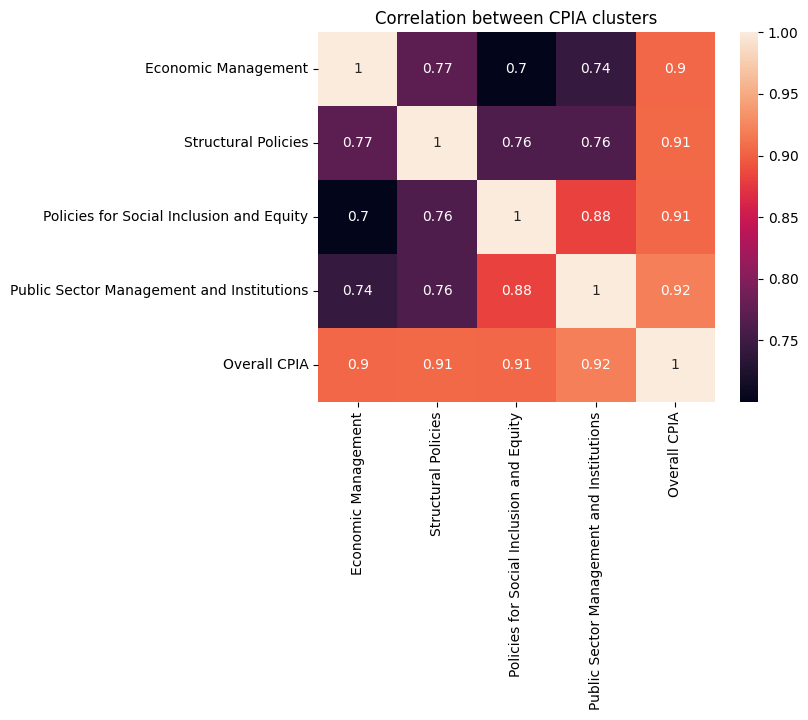

In [15]:
# List of numerical variables
ratings = ['Economic Management', 'Structural Policies', 'Policies for Social Inclusion and Equity', 'Public Sector Management and Institutions', 'Overall CPIA']

sns.heatmap(cpia_africa[ratings].corr(), annot=True)
plt.title('Correlation between CPIA clusters')
plt.show()

All clusters are highly correlated with each other, with the relationship between **Policies for Social Inclusion and Equity** and **Public Administration and Institutions** being the highest.

In [16]:
#cpia_africa.to_csv('cpia_africa.csv', index=False)

2. **Analysing how African countries perform based on CPIA ratings**

**Question 3: How are the scores distributed across the different categories?**

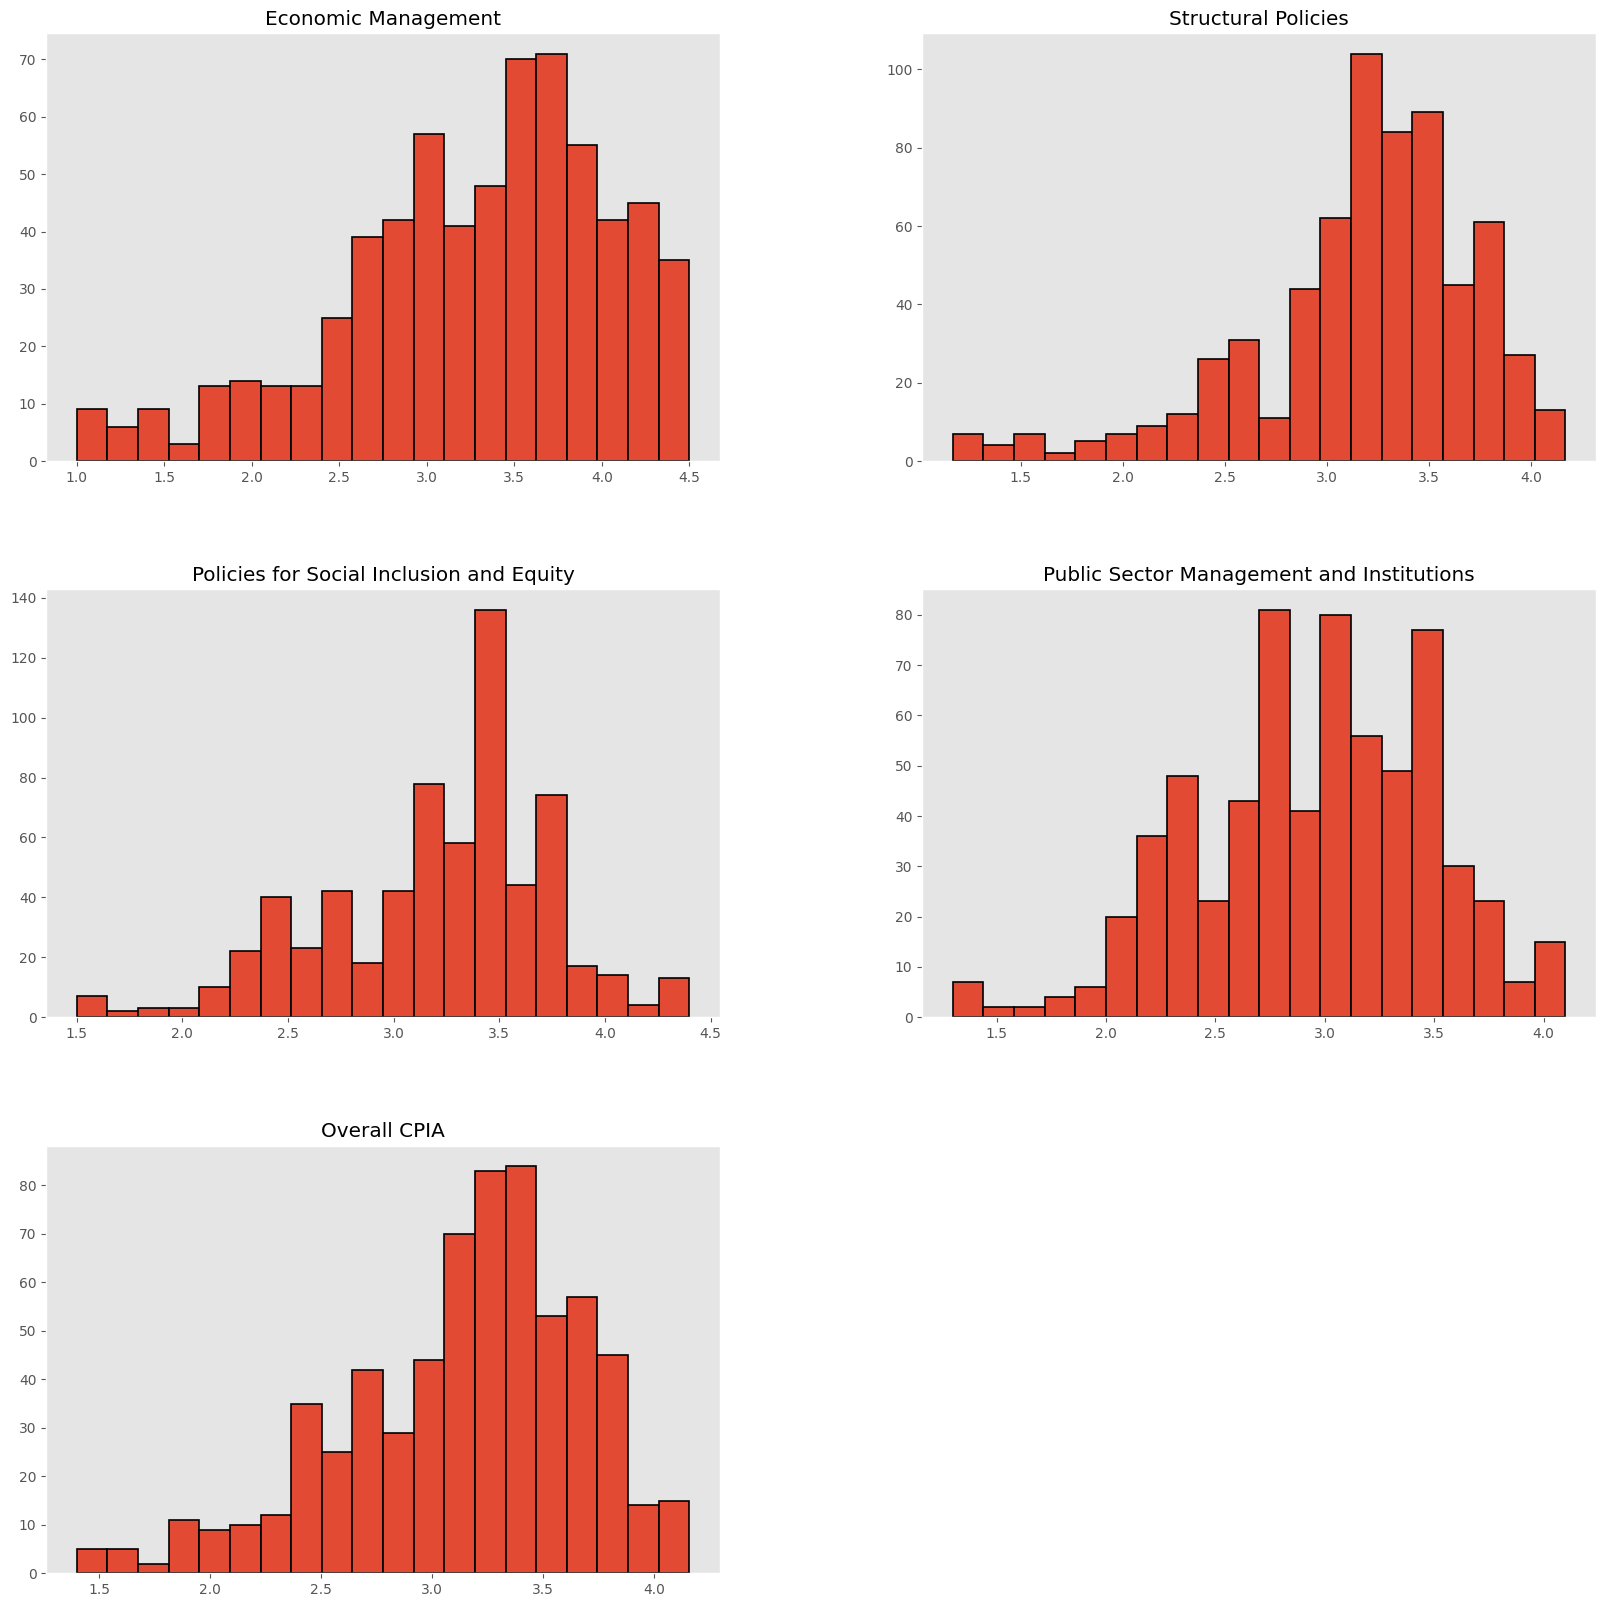

In [17]:
# Distribution of the numerical variables
plt.style.use('ggplot')
cpia_africa.drop(columns=['Year']).hist(figsize=(20,20), edgecolor='black', linewidth=1.2, bins=20, grid=False) 
plt.show()

The distributions of the scores tend to follow a normal distribution. They are also slightly skewed to the left, indicating that there are fewer countries with lower CPIA scores.

**Question 4: How do the ratings differ across clusters?**

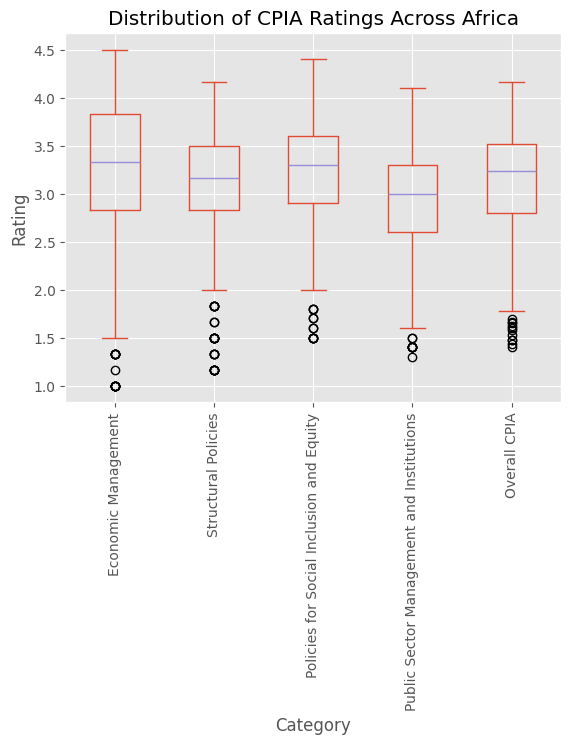

In [18]:
# Visualizing the spread and outliers in CPIA rating variables using boxplots
cpia_africa[ratings].plot(kind='box')
plt.title('Distribution of CPIA Ratings Across Africa')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

For all categories, the median score is between 3 and 3.5, suggesting that African countries perform at a moderate level across the CPIA indicators. Among the categories, the **Public Sector Management and Institutions** cluster is the weakest, indicating weakness in governance-related functions. The Economic Management cluster has a wider range of scores, showing inconsistencies in performance across African countries. In addition, the presence of outliers in all categories indicates the existence of a few countries with significantly weaker performance in certain policy areas.

**Question 5: How do the ratings differ between different regions in Africa?**

In [19]:
# Count unique countries within each sub-region
cpia_africa[['Sub-region', 'Country or Area']].drop_duplicates().groupby('Sub-region').count()

,Country or Area
Sub-region,
Northern Africa,1
Sub-Saharan Africa,35


Since there is only one country from Northern Africa represented in the dataset, conducting a meaningful comparison of performance across sub-regions is not feasible.

In [20]:
# Count unique countries within each intermediate-region
cpia_africa[['Intermediate-region', 'Country or Area']].drop_duplicates().groupby('Intermediate-region')\
    .count().sort_values(by='Country or Area', ascending=False) 

,Country or Area
Intermediate-region,
Eastern Africa,15
Western Africa,14
Middle Africa,5
Northern Africa,1
Southern Africa,1


In [21]:
# List of countries in each intermediate-region

# Prepare the data
region_wise_countries = cpia_africa[['Intermediate-region', 'Country or Area']].drop_duplicates()

# List of Intermediate regions
intermediate_regions = region_wise_countries['Intermediate-region'].unique()

# Display the countries by region
for region in intermediate_regions:
    display(region_wise_countries[region_wise_countries['Intermediate-region']==region])

,Intermediate-region,Country or Area
0,Middle Africa,Angola
85,Middle Africa,Cameroon
104,Middle Africa,Central African Republic
123,Middle Africa,Chad
161,Middle Africa,Congo


,Intermediate-region,Country or Area
9,Western Africa,Benin
28,Western Africa,Burkina Faso
66,Western Africa,Cabo Verde
237,Western Africa,Ghana
256,Western Africa,Guinea
275,Western Africa,Guinea-Bissau
332,Western Africa,Liberia
385,Western Africa,Mali
404,Western Africa,Mauritania
442,Western Africa,Niger


,Intermediate-region,Country or Area
47,Eastern Africa,Burundi
142,Eastern Africa,Comoros
180,Eastern Africa,Djibouti
199,Eastern Africa,Eritrea
218,Eastern Africa,Ethiopia
294,Eastern Africa,Kenya
347,Eastern Africa,Madagascar
366,Eastern Africa,Malawi
423,Eastern Africa,Mozambique
480,Eastern Africa,Rwanda


,Intermediate-region,Country or Area
313,Southern Africa,Lesotho


,Intermediate-region,Country or Area
555,Northern Africa,Sudan


In [22]:
# Visualisation of countries by intermediate-region

# Import the library
from plotly import express as px

# Prepare data
region_wise_countries = cpia_africa[['Intermediate-region', 'Country or Area']].drop_duplicates()

# Create the choropleth
fig = px.choropleth(
    region_wise_countries,
    locations='Country or Area',
    locationmode='country names',
    color='Intermediate-region',  
    color_discrete_sequence=px.colors.qualitative.Plotly,  
    title='African countries by sub-region (only those included in the dataset)',
    scope='africa'
)

fig.show()

In the given dataset, there is only one country in each of the regions **Northern Africa** and **Southern Africa**, namely **Sudan** and **Lesotho** respectively.

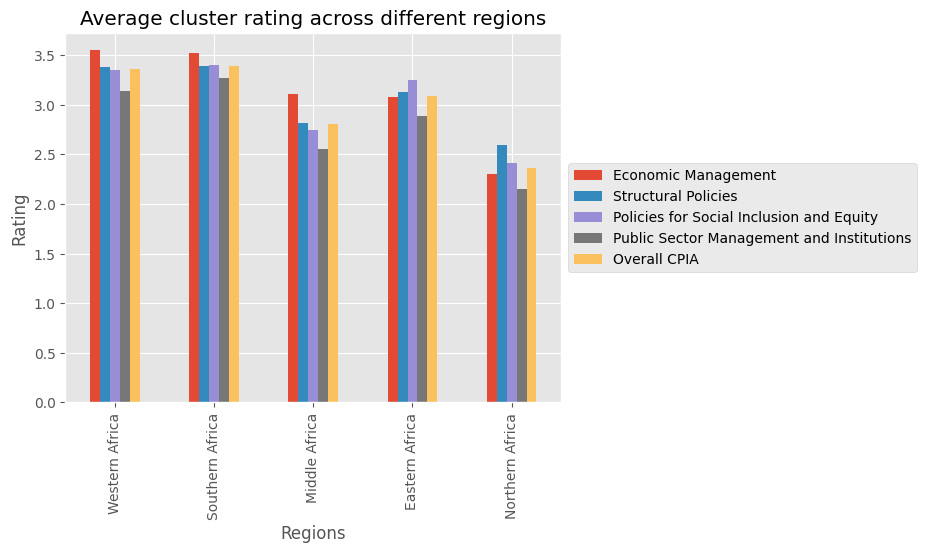

In [23]:
# Visualisation of the distribution of ratings across different regions
cpia_africa.groupby('Intermediate-region')[ratings].mean().sort_values(by='Economic Management', ascending=False).plot(kind='bar')
plt.ylabel('Rating')
plt.xlabel('Regions')
plt.title('Average cluster rating across different regions')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**West Africa** and **Southern Africa** show a similar trend in all categories. They perform better than other regions in Africa. Despite being the only country considered in **Southern Africa**, **Lesotho** performs better than the average of the other regions. 

**Northern Africa** performs poorly compared to other regions in all categories. However, the fact that there is only one country in Northern Africa cannot be ignored. 

The **Public Sector Management and Institutions** cluster is consistently weak in all regions.

**Question 6: Which countries perform better and which worse?**
**Which are the countries with the lowest and highest recorded scores and the years in which the scores were recorded?**

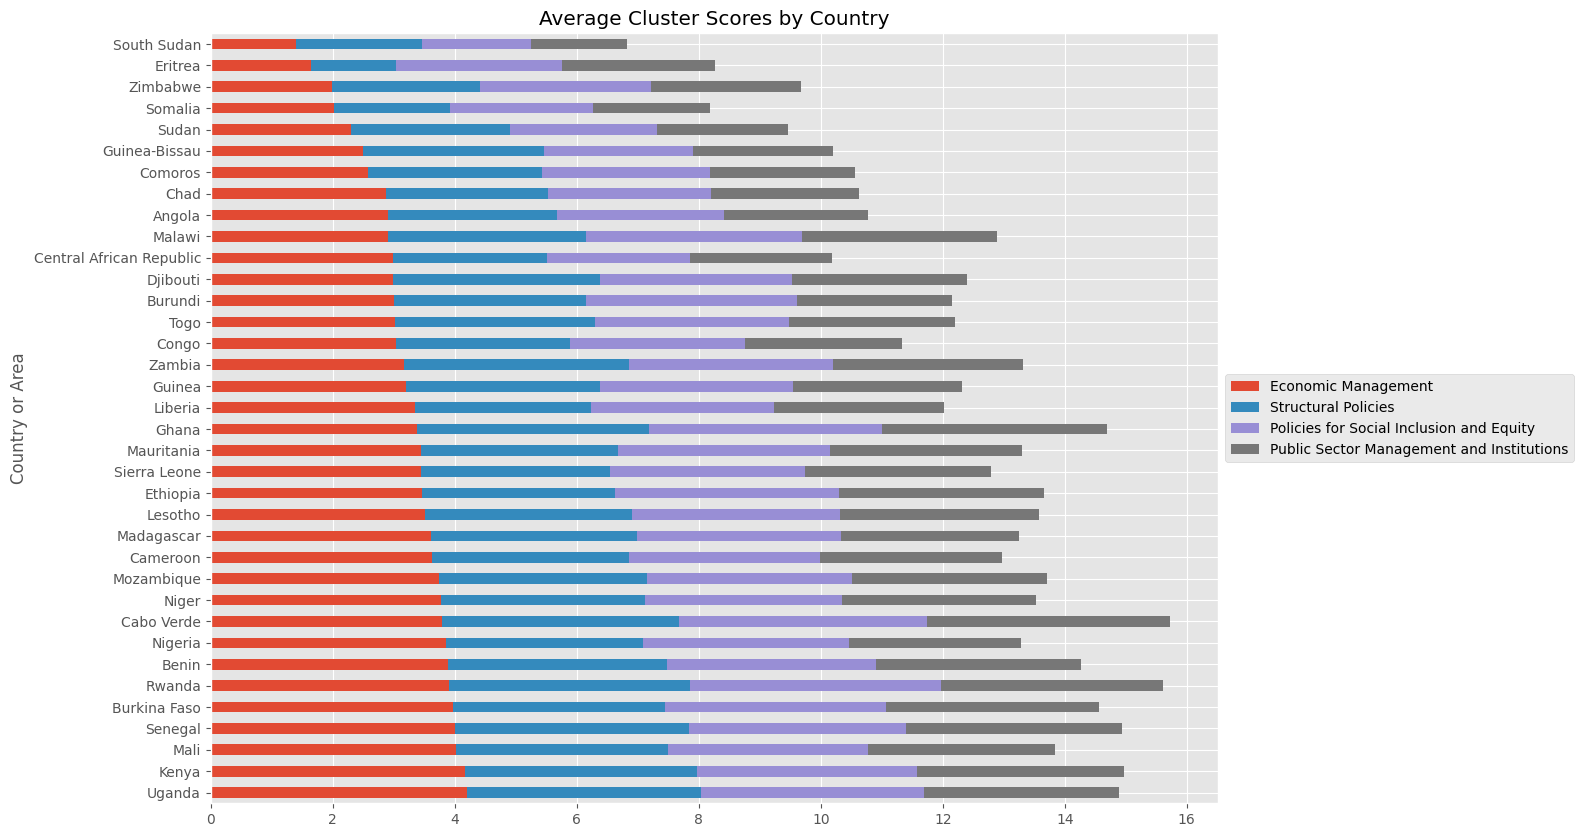

In [24]:
# Visualisation of average cluster scores by country
cpia_africa_country = cpia_africa.groupby('Country or Area')[clusters].mean()

fig, ax = plt.subplots(figsize=(13, 10))
cpia_africa_country.sort_values(by='Economic Management', ascending=False).plot.barh(stacked=True, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Average Cluster Scores by Country')
plt.show()

On average, **Cabo Verde** and **Rwanda** stand out as the top performers across the clusters. In addition to these two, **Uganda**, **Kenya**, **Senegal**, and **Ghana** also show relatively strong performance.

On the other end of the spectrum, **South Sudan**, **Eritrea**, and **Somalia** rank among the lowest-performing countries.

In [25]:
# Countries with lower Overall CPIA ratings

# Calculate IQR and lower whisker
q1 = cpia_africa['Overall CPIA'].quantile(0.25)
q3 = cpia_africa['Overall CPIA'].quantile(0.75)
iqr = q3-q1
lower_whisker = q1 - 1.5*iqr

# Filter countries with Overall CPIA rating below the lower whisker
display(cpia_africa[cpia_africa['Overall CPIA']<lower_whisker])

,Country or Area,Country Code,Sub-region,Intermediate-region,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Overall CPIA
199,Eritrea,ERI,Sub-Saharan Africa,Eastern Africa,2023,1.500000,1.166667,2.6,1.5,1.691667
543,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2023,1.666667,2.000000,1.7,1.3,1.666667
544,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2022,1.500000,2.000000,1.6,1.4,1.625000
545,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2021,1.500000,2.000000,1.5,1.4,1.600000
546,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2020,1.166667,1.833333,1.5,1.4,1.475000
547,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2019,1.000000,1.833333,1.5,1.4,1.433333
548,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2018,1.000000,2.000000,1.5,1.4,1.475000
549,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2017,1.000000,2.000000,1.7,1.4,1.525000
550,South Sudan,SSD,Sub-Saharan Africa,Eastern Africa,2016,1.000000,2.000000,1.8,1.5,1.575000
646,Zimbabwe,ZWE,Sub-Saharan Africa,Eastern Africa,2008,1.000000,1.500000,1.5,1.6,1.400000


In [26]:
# Country with lowest Overall CPIA rating
cpia_africa[cpia_africa['Overall CPIA'] == cpia_africa['Overall CPIA'].min()]

,Country or Area,Country Code,Sub-region,Intermediate-region,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Overall CPIA
646,Zimbabwe,ZWE,Sub-Saharan Africa,Eastern Africa,2008,1.0,1.5,1.5,1.6,1.4


**Zimbabwe** recorded the lowest CPIA rating of 1.4 in 2008. **South Sudan** has consistently reported an overall rating in the range of 1.4 to 1.6 from 2016 to 2023.

In [27]:
# Country with highest Overall CPIA rating

# Calculate upper whisker
upper_whisker = q3 + 1.5*iqr
print(f'The upper whisker correspondes to {upper_whisker}')

# Filter countries with Overall CPIA rating above the upper whisker
display(cpia_africa[cpia_africa['Overall CPIA'] > upper_whisker]) 

The upper whisker correspondes to 4.597916666666666


,Country or Area,Country Code,Sub-region,Intermediate-region,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Overall CPIA


No country recorded a CPIA rating higher than 4.6.

In [28]:
# Top performing countries
display(cpia_africa.sort_values(by='Overall CPIA', ascending=False).head(15))

,Country or Area,Country Code,Sub-region,Intermediate-region,Year,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Overall CPIA
82,Cabo Verde,CPV,Sub-Saharan Africa,Western Africa,2007,4.500000,3.833333,4.3,4.0,4.158333
80,Cabo Verde,CPV,Sub-Saharan Africa,Western Africa,2009,4.500000,3.833333,4.3,4.0,4.158333
81,Cabo Verde,CPV,Sub-Saharan Africa,Western Africa,2008,4.500000,3.800000,4.3,4.0,4.150000
480,Rwanda,RWA,Sub-Saharan Africa,Eastern Africa,2023,4.000000,4.166667,4.4,3.9,4.116667
79,Cabo Verde,CPV,Sub-Saharan Africa,Western Africa,2010,4.333333,3.833333,4.3,4.0,4.116667
84,Cabo Verde,CPV,Sub-Saharan Africa,Western Africa,2005,4.166667,4.000000,4.3,3.9,4.091667
83,Cabo Verde,CPV,Sub-Saharan Africa,Western Africa,2006,4.333333,3.833333,4.3,3.9,4.091667
481,Rwanda,RWA,Sub-Saharan Africa,Eastern Africa,2022,4.000000,4.166667,4.3,3.8,4.066667
482,Rwanda,RWA,Sub-Saharan Africa,Eastern Africa,2021,4.000000,4.166667,4.3,3.8,4.066667
483,Rwanda,RWA,Sub-Saharan Africa,Eastern Africa,2020,4.000000,4.166667,4.3,3.8,4.066667


As noted earlier, **Cabo Verde** and **Rwanda** have consistently outperformed other countries over the years.

3. **Trends in CPIA Ratings Over the Years**

**Question 7: How has the Overall CPIA rating of African countries changed over the years?**

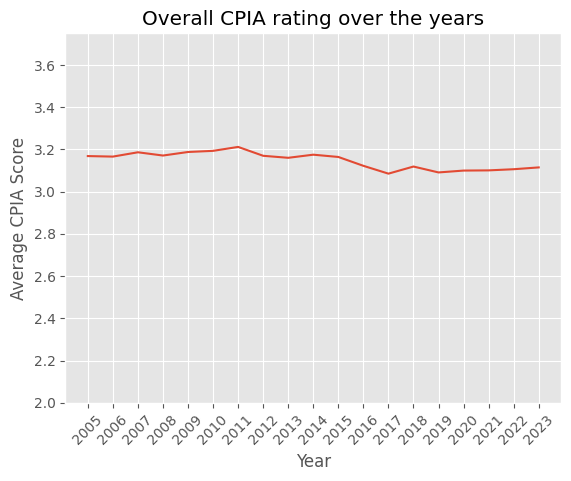

In [29]:
# Visualisation of the average trend in Africa over the years
cpia_africa_year = cpia_africa.groupby(['Year'])['Overall CPIA'].mean()
years = cpia_africa_year.index
cpia_africa_year.plot()
plt.title("Overall CPIA rating over the years")
plt.ylabel("Average CPIA Score")
plt.xticks(ticks=years, rotation=45)
plt.ylim([2,3.75])
plt.show()
plt.show()

From 2005 to 2011, there was a gradual increase in the average CPIA score across African countries, peaking in 2011, which marks the highest point in the observed period.

Between 2012 and 2015, scores began to decline gradually, followed by a sharp drop in 2016 and 2017, with 2017 recording the lowest average CPIA score.

From 2018 onward, the average score shows a slow but steady improvement up to 2023.

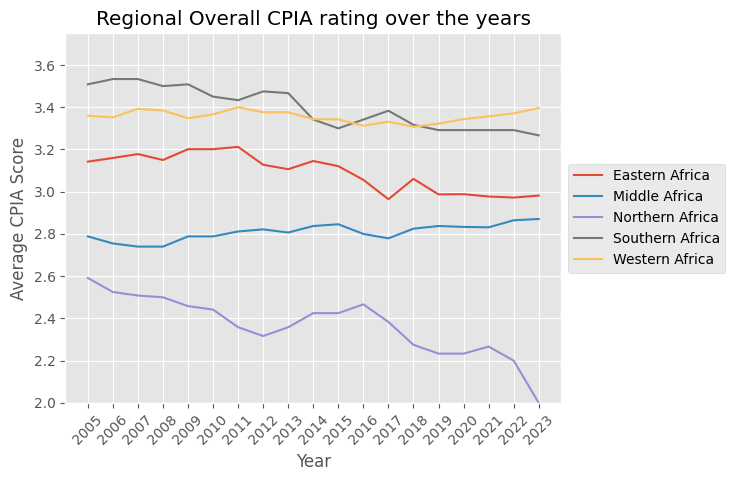

In [30]:
# Visualisation of regional trends in Overall CPIA rating over the years
cpia_africa_year_inter = pd.pivot_table(data=cpia_africa, index='Year', columns='Intermediate-region', values='Overall CPIA')
cpia_africa_year_inter.plot()
plt.title("Regional Overall CPIA rating over the years")
plt.ylabel("Average CPIA Score")
plt.xticks(ticks=years, rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([2,3.75])
plt.show()

While the overall trend in CPIA ratings across Africa tends to be more stable, regional patterns tend to fluctuate.

**Central and West Africa**:
These regions have experienced a gradual and steady increase in CPIA ratings over the years.

**Southern and Eastern Africa**:
In contrast, these regions show a gradual decline.

**Northern Africa**:
This region exhibits the most unstable trend, marked by drops and peaks, possibly reflecting inconsistent data coverage.

**Question 8: How has the average rating between clusters changed over the years?**

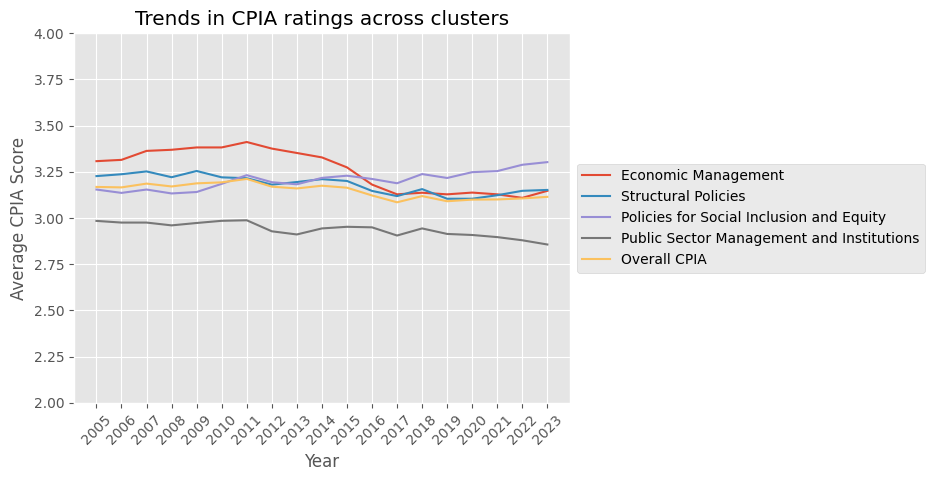

In [31]:
# Visualisation of trends in CPIA ratings across clusters
cpia_africa_year_cluster = cpia_africa.groupby('Year')[ratings].mean()

cpia_africa_year_cluster.plot()
plt.title("Trends in CPIA ratings across clusters")
plt.ylabel("Average CPIA Score")
plt.xticks(ticks=years, rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([2, 4])
plt.show()

The **Economic Management** cluster exhibits the highest variability in average ratings over the years.

The **Public Sector Management and Institutions** cluster has consistently underperformed compared to other clusters.

The **Policies for Social Inclusion and Equity** cluster shows a gradual and encouraging improvement, suggesting positive improvements in areas such as gender equality, social protection, and inclusive development. In contrast, all other clusters have experienced a gradual decline in their average ratings.

**Question 9: How has the average rating between clusters in the top performing countries changed over the years?**

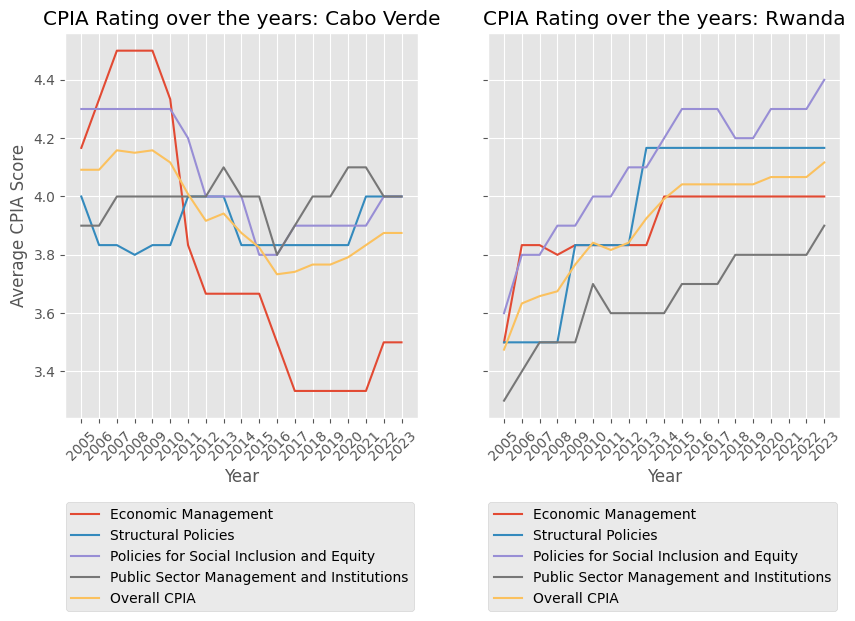

In [33]:
# Visualisation of trends in the CPIA ratings of the clusters in the top performing countries 

# List of top performing countries 
top_performing_countries = ['Cabo Verde', 'Rwanda']

# Creating the plot
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True)
for ax, country in zip(axs.ravel(), top_performing_countries):
    top_country = cpia_africa[cpia_africa['Country or Area']==country]
    top_country.plot(x='Year', y=ratings, ax=ax)
    ax.set_title(f'CPIA Rating over the years: {country}')
    ax.set_ylabel('Average CPIA Score')
    ax.set_xlabel('Year')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(bbox_to_anchor=(1.01, -0.2))
    ax.set_xticks(ticks=years)
plt.show()


**Question 10: How has the average rating between clusters in the lowest performing countries changed over the years??**

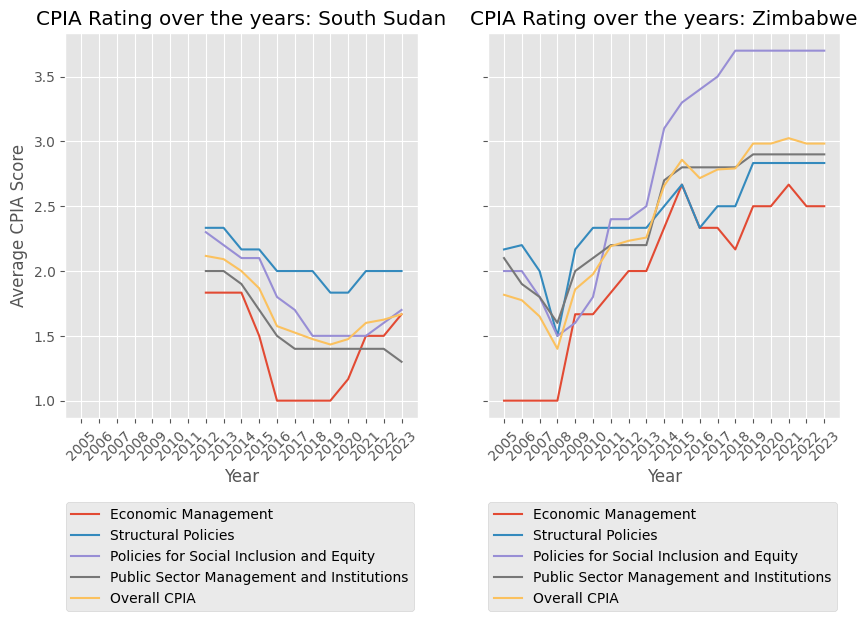

In [34]:
# Visualisation of trends in the CPIA ratings of the clusters in the lowest performing countries 

# List of lowest performing countries
lowest_performing_countries = ['South Sudan', 'Zimbabwe']

# Creating the plot
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True)
for ax, country in zip(axs.ravel(), lowest_performing_countries):
    top_country = cpia_africa[cpia_africa['Country or Area']==country]
    top_country.plot(x='Year', y=ratings, ax=ax)
    ax.set_title(f'CPIA Rating over the years: {country}')
    ax.set_ylabel('Average CPIA Score')
    ax.set_xlabel('Year')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticks(ticks=years)
    ax.legend(bbox_to_anchor=(1.01, -0.2))
plt.show()

### Identifying the countries with similar cluster ratings using KMeans cluster analysis

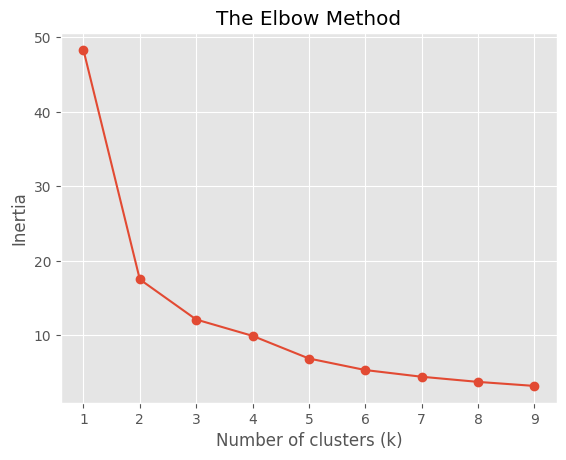

In [35]:
# Prepare data with cluster scores only
cpia_africa_country_numeric = cpia_africa_country[clusters]

# Import KMeans
from sklearn.cluster import KMeans 

# Finding the best number of clusters using the elbow method
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)
    # Fit model to data
    model.fit(cpia_africa_country_numeric)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title('The Elbow Method')
plt.show()


The aim of the **elbow method** is to identify the point at which the rate of decrease of inertia changes sharply, indicating that adding more clusters has diminishing returns. Here inertia is the sum of the squared distances of each data point to its nearest cluster centre. A lower inertia indicates that the data points are closely grouped around their respective cluster centres. 

From the above graph, the optimal number of clusters could be 2, 3 or 4. To confirm the optimal number, we calculate the **silhouette score** corresponding to the KMeans algorithm with clusters 2, 3 and 4. The silhouette score is the measure of how well each point fits into its assigned cluster compared to other clusters. Its value ranges from -1 to 1, with 1 being the perfect cluster. We will choose the number of clusters with the highest silhouette score as the optimal number.

In [36]:
# Calculating the silhouette_score
from sklearn.metrics import silhouette_score
for k in range(2,6):
    kmenas_clusters_k = KMeans(n_clusters=k, random_state=42)
    silhouette_score_cluster_k = silhouette_score(cpia_africa_country_numeric, kmenas_clusters_k.fit_predict(cpia_africa_country_numeric))
    print(f'The Silhouette score for KMeans with {k} clusters is {silhouette_score_cluster_k}')

The Silhouette score for KMeans with 2 clusters is 0.5434207574217156
The Silhouette score for KMeans with 3 clusters is 0.39441273496887547
The Silhouette score for KMeans with 4 clusters is 0.3531916275592556
The Silhouette score for KMeans with 5 clusters is 0.367425783176375


Based on the computed silhouette scores, set the optimal number of clusters to be two.

In [37]:
# Run KMeans algorithm with number of clusters equals to 2
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to data
labels = kmeans.fit(cpia_africa_country_numeric)

**Question 11: How can we group the countries on the basis of CPIA scores?**

In [38]:
# Add an additional column to the dataframe to show the labels predicted by the kmeans algorithm
cpia_africa_country['Groups'] = labels.labels_

In [39]:
# List of countries grouped in the first cluster
display(cpia_africa_country[cpia_africa_country['Groups']==0])

,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Groups
Country or Area,,,,,
Benin,3.894737,3.580702,3.431579,3.363158,0
Burkina Faso,3.971930,3.473684,3.626316,3.489474,0
Burundi,3.007017,3.147368,3.463158,2.526316,0
Cabo Verde,3.789474,3.892982,4.057895,3.989474,0
Cameroon,3.633333,3.229825,3.131579,2.968421,0
Djibouti,2.991228,3.396492,3.147368,2.857895,0
Ethiopia,3.463158,3.168421,3.663158,3.357895,0
Ghana,3.378947,3.798246,3.831579,3.678947,0
Guinea,3.201754,3.173684,3.173684,2.773684,0


In [40]:
# List of countries grouped in the other cluster
display(cpia_africa_country[cpia_africa_country['Groups']==1])

,Economic Management,Structural Policies,Policies for Social Inclusion and Equity,Public Sector Management and Institutions,Groups
Country or Area,,,,,
Angola,2.907407,2.774074,2.733333,2.366667,1
Central African Republic,2.980702,2.536842,2.331579,2.336842,1
Chad,2.878948,2.656141,2.657895,2.431579,1
Comoros,2.570175,2.852632,2.763158,2.378947,1
Congo,3.033333,2.849123,2.868421,2.578947,1
Eritrea,1.642105,1.394737,2.715789,2.510526,1
Guinea-Bissau,2.489474,2.966667,2.452632,2.294737,1
Somalia,2.027778,1.888889,2.350000,1.916667,1
South Sudan,1.402778,2.055556,1.791667,1.566667,1


Based on the grouping by KMeans and the corresponding CPIA scores, **Group 0** can be identified with high performing countries and **Group 1** with low performing countries.

In [41]:
# Renaming the groups for clarity
cpia_africa_country_performance = cpia_africa_country.copy()

cpia_africa_country_performance['Groups'] = cpia_africa_country_performance['Groups'].map({0:'High performing countries', 1:'Low performing countries'})

In [42]:
# Visualisation of KMeans clusters of countries based on their CPIA score

# Create the plot
fig = px.choropleth(
    cpia_africa_country_performance,
    locations=cpia_africa_country_performance.index,
    locationmode='country names',
    color='Groups',  
    color_discrete_sequence=px.colors.qualitative.Vivid,  
    title='Grouping of African countries by CPIA performance',
    scope='africa'
)

fig.show()